In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
card_data=pd.read_csv('creditcard.csv')
card_data.shape

(284807, 31)

In [3]:
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [72]:
normal_data= len(card_data[card_data['Class']==0])/len(card_data['Class'])*100
fraud_data = len(card_data[card_data['Class']==1])/len(card_data['Class'])*100
transition_data={'Class':['Normal Transition', 'Fraud Transition'],
                'Percentage (%)':[normal_data, fraud_data]}
transition_dataframe= pd.DataFrame(transition_data)
transition_dataframe

,Class,Percentage (%)
0,Normal Transition,99.827251
1,Fraud Transition,0.172749


### Normal Card Transition vs. Fraud Card Transition

In [19]:
normal_card=len(card_data[card_data['Class']==0])
fraud_card=len(card_data[card_data['Class']==1])

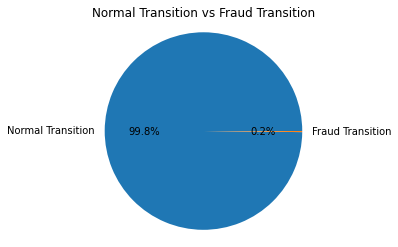

In [73]:
Tasks = [normal_card,fraud_card]
labels = 'Normal Transition','Fraud Transition'
plt.pie(Tasks,labels=labels,autopct='%1.1f%%')
plt.title('Normal Transition vs Fraud Transition')
plt.axis('equal')
plt.show()

In [20]:
normal_transition = card_data.loc[card_data['Class'] == 0]["Time"]
fraud_transition = card_data.loc[card_data['Class'] == 1]["Time"]

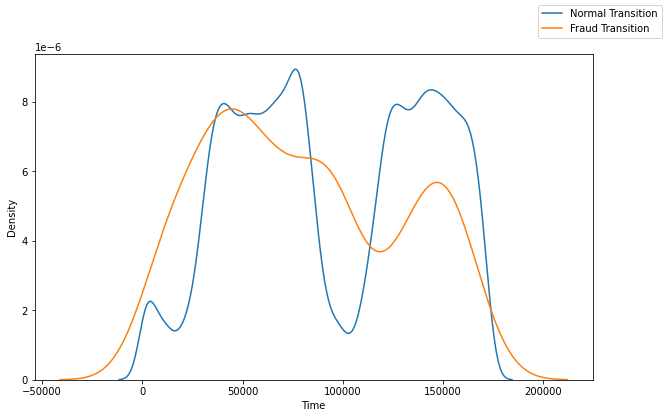

In [28]:
fig = plt.figure(figsize=(10,6))
sns.distplot(normal_transition,hist=False)
sns.distplot(fraud_transition,hist=False)
fig.legend(labels=['Normal Transition','Fraud Transition'])

<AxesSubplot:>

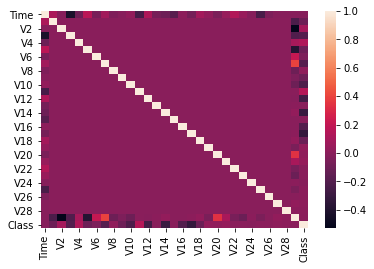

In [29]:
sns.heatmap(card_data.corr())

In [30]:
X=card_data.drop(['Class'],axis=1)
Y=card_data['Class']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)

LogisticRegression()

In [36]:
pred_log=model_log.predict(X_test)
log_score =model_log.score(X_train,Y_train)
log_pred_score =round(log_score*100,2)
log_pred_score

99.91

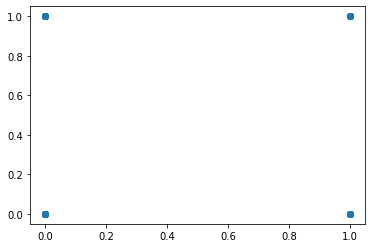

In [37]:
plt.scatter(Y_test,pred_log)

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model_decision=DecisionTreeClassifier()
model_decision.fit(X_train,Y_train)

DecisionTreeClassifier()

In [41]:
pred_decision=model_decision.predict(X_test)
decision_score =model_decision.score(X_train,Y_train)
decision_pred_score =round(decision_score*100,2)
decision_pred_score

100.0